# Data Science z Python 3.10. Identyfikacja klas zdjęć z fast.ai v2 i budowa aplikacji
## 🇬🇧 Data Science with Python 3.10. Classification of images using fast.ai v2 and application
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek
#### 🇬🇧 Import libraries 

In [ ]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dataset')
path = Path('/content/drive/My Drive/dataset')

Mounted at /content/drive


### 2. Brakuje danych treningowych?
#### 🇬🇧 Lack of data?

... zawsze możemy w tym celu skorzystać z zasobów Internetu i pobrać dane z Internetu. Uważaj jednak na słowa, które wpisujesz - w końcu pobierasz automatycznie dane z Internetu i nie chcesz mieć na swoim dysku Google dziwnych rzeczy ;)

... we can always download data from the Internet. However, be careful with the keywords that you type - you are going to automatically download data from the Internet and you don't want to have strange things on your Google Drive ;)

In [ ]:
klasy = 'Lithobates sylvaticus', 'Pelophylax lessonae', 'Lithobates palustris' # w tym miejscu wpisujemy nazwę obiektu, który chcemy wyszukać np. 'pies' i 'kot'
path = Path('treningowe') # podajemy nazwę folderu, w którym znajdą się pliki
if not path.exists(): # folder zostanie dla nas stworzony, jeżeli jeszcze go nie mamy
  path.mkdir()
  for o in klasy:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} frog', max_images=100) # w miejsce keyword podajemy dodatkowe słowo kluczowe do wyszukiwarki np. "zwierzaki"
    download_images(dest, urls=urls)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

In [ ]:
classes = ['Lithobates sylvaticus', 'Pelophylax lessonae', 'Lithobates palustris']

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42), #valid_pct - jak dużo do % testowania modelu
    get_y=parent_label,
    item_tfms=Resize(512)
)

In [ ]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # Określamy ilość materiałów treningowych oraz walidacyjnych, wielkość zdjęć, augmentację
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)
# W fastai 2.0 dane przedstawiane są w formie DataBlock, to tutaj dokonujemy augmentacji danych

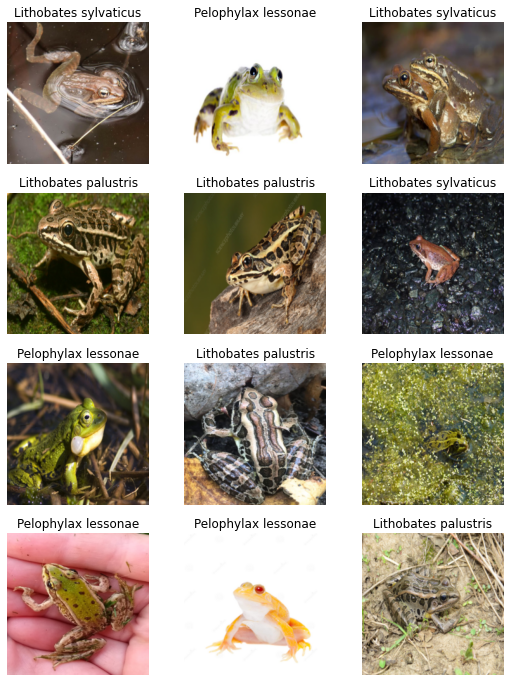

In [ ]:
dls.valid.show_batch(max_n=12, nrows=4)

In [ ]:
learn = vision_learner(dls, alexnet, metrics=accuracy) #resnet101, resnet152, vgg19...

In [ ]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.660909,0.735630,0.625000,00:09
1,1.199979,0.455647,0.892857,00:09


In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.export(fname='model.pkl')

Dalszą część pracy wykonujemy w skrypcie app.py - chcemy zbudować aplikację do stworzonego przez nas modelu w Streamlit.

 Now we are ready to work with app.py - we want to build application using Streamlit.

### 📚 Zadanie
##### 1. Wytrenuj nowy model ML do różnicowania zdjęć trzech gatunków żaby (Lithobates sylvaticus, Pelophylax lessonae, Lithobates palustris). Wykorzystaj podany na zajęciach skrypt do ściągnięcia odpowiednich danych treningowych.
##### 2. Opisz swój model - czy cechuje się dostateczną dokładnością klasyfikacji? Jak przebiegał proces uczenia się? (po której epoce widoczna jest stabilizacja validation loss?)
##### 3. Zbuduj aplikację do stworzonego przez siebie modelu (wykorzystaj do tego app.py). Pamiętaj, żeby odpowiednio dostosować aplikację.
##### 4. Ściągnij to zdjęcie i przedstaw dokładność klasyfikacji. Którą klasę (gatunek żaby) przewiduje Twój model? https://4.bp.blogspot.com/-HqyO-ROSWQM/WvSNs0qkT3I/AAAAAAAAel4/GH1LCFGNlIsAHh1PFnF9F6Dj6jzLL60aQCLcBGAs/s1600/kumakFB2a.png
### 🇬🇧 Task
##### 1. Train a new ML model to classify photos of three frog species (Lithobates sylvaticus, Pelophylax lessonae, Lithobates palustris). Use the script provided during the classes to download the relevant training data.
##### 2. Describe your model - is it characterized by sufficient accuracy? How could you describe the learning process? (when validation loss is stabilising?)
##### 3. Build the application for the model you created (use app.py).
##### 4. Download this photo and present the accuracy of the classification. Which class (frog species) does your model predict? https://4.bp.blogspot.com/-HqyO-ROSWQM/WvSNs0qkT3I/AAAAAAAAel4/GH1LCFGNlIsAHh1PFnF9F6Dj6jzLL60aQCLcBGAs/s1600/kumakFB2a.png

https://share.streamlit.io/s21072/pum_cw9/main/app.py

^Link do apki